# Homework 2
Chelsea Ajunwa

## Question 2a

In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import algorithms
import community
import graph_tool.all as gt
import pyintergraph

In [402]:
#Creating graph from edge file

G = nx.read_edgelist("fb-pages-tvshow/fb-pages-tvshow.edges", nodetype=str,delimiter=",") 
# nx.draw(G)

#adding nodes
nodes = {}
with open("fb-pages-tvshow/fb-pages-tvshow.nodes") as f:
    for line in f:
        cols = line.strip().split(",")
        # print(cols)
        node_id = cols[2]
        name = cols[1]
        nodes[node_id] = {"name": name}

nx.set_node_attributes(G, nodes)




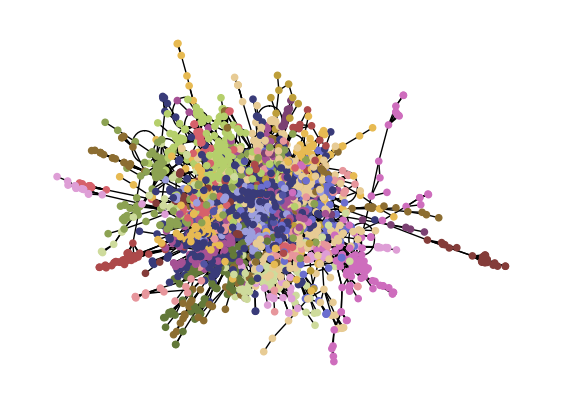

In [406]:


#Problem 2i
#Modularity maximization 

partition = community.best_partition(G)


colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(partition.values())))))
colors_nodes = [colors_sns[partition[node]] for node in G.nodes()]

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax,node_size=20)




In [409]:
#Problem 2ii - report modularity
Q = community.modularity(partition,G)
print(Q)

0.8721982737009414


In [411]:
#Problem 2iii - report number of communities

num_communities = len(set(list(partition.values())))

print(num_communities)

48


In [413]:
#Problem 2iv
print(partition)

{'0': 0, '1838': 0, '1744': 0, '14': 0, '2543': 0, '1': 1, '1009': 1, '1171': 1, '1465': 1, '2069': 1, '2080': 1, '1856': 2, '3799': 1, '1033': 1, '2717': 1, '300': 1, '1603': 1, '942': 1, '3678': 1, '952': 1, '815': 1, '2': 3, '3656': 3, '3459': 3, '1157': 3, '1993': 3, '3': 4, '386': 4, '2659': 4, '2160': 4, '1925': 4, '3511': 4, '372': 4, '1506': 4, '2303': 4, '1634': 4, '1706': 4, '3038': 4, '749': 4, '2790': 4, '452': 4, '1936': 4, '2915': 4, '2972': 4, '1100': 4, '2918': 4, '3026': 4, '2406': 4, '1673': 4, '11': 4, '3156': 4, '2250': 4, '2350': 4, '1050': 4, '1060': 4, '1457': 4, '3054': 4, '72': 4, '1553': 4, '1114': 4, '3525': 4, '2064': 4, '3791': 4, '1595': 4, '1177': 4, '1596': 4, '2935': 4, '545': 4, '1840': 4, '423': 4, '1788': 4, '2890': 4, '603': 4, '1498': 4, '703': 4, '1073': 4, '1422': 4, '3283': 4, '2590': 4, '3431': 4, '354': 4, '1720': 4, '3291': 4, '2773': 4, '2804': 4, '2476': 4, '2036': 4, '46': 4, '1986': 4, '2588': 4, '3507': 4, '566': 4, '4': 3, '667': 3, '19

## Question 2b

Number of communites: 60


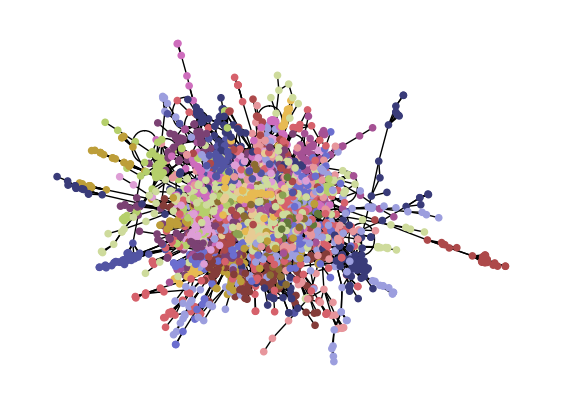

In [415]:
#Using graph-tool to create a partition

#converting to graph-tool graph
gtg = pyintergraph.nx2gt(G, labelname="node_label")

#creating partition of network
state = gt.minimize_blockmodel_dl(gtg)



#storing partition as dictionary and change node labels back to networkx format

b = state.get_blocks()

gt_partition = {vertex:0 for vertex in list(gtg.get_vertices())}

for vertex in list(gtg.get_vertices()):
    gt_partition[vertex] = b[vertex]


#visualizing network

colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(gt_partition.values())))))

map_communities={y:x for x,y in enumerate(set(gt_partition.values()))}

colors_nodes = [colors_sns[map_communities[gt_partition[node]]] for node in list(gtg.vertices())]

fig, ax = plt.subplots(1,1,figsize=(7,5),dpi=100)

nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax,node_size=20)

#number of communities
gt_num_communities=len(set(list(gt_partition.values())))
print(f'Number of communites: {gt_num_communities}')

## Question 2c


In [419]:
#First get degree sequence

degree_seq = [dict(G.degree)[node] for node in G.nodes()]

#Next, create degree-preserving randomization

G_rand = nx.random_degree_sequence_graph(degree_seq)

#running modularity maximization
partition_rand = community.best_partition(G_rand)

#running description length minimization
gtg_rand = pyintergraph.nx2gt(G_rand, labelname="node_label")
state = gt.minimize_blockmodel_dl(gtg_rand)

b = state.get_blocks()

gt_partition_rand = {vertex:0 for vertex in list(gtg_rand.get_vertices())}

for vertex in list(gtg_rand.get_vertices()):
    gt_partition_rand[vertex] = b[vertex]

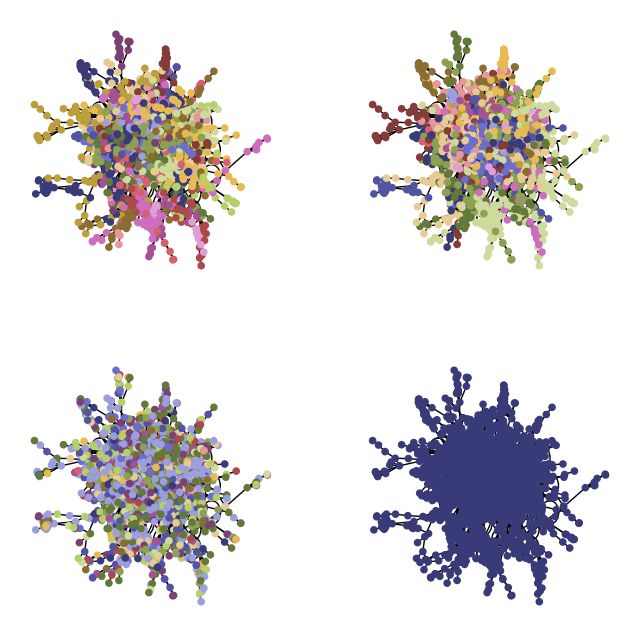

In [273]:
#plotting networks

fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=100)
pos = nx.spring_layout(G)


# networkx partition
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(partition.values())))))
colors_nodes = [colors_sns[partition[node]] for node in G.nodes()]
nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax[0,0],node_size=20)

#graph-tool partition
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(gt_partition.values())))))
map_communities={y:x for x,y in enumerate(set(gt_partition.values()))}
colors_nodes = [colors_sns[map_communities[gt_partition[node]]] for node in list(gtg.vertices())]
nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax[0,1],node_size=20)

#randomized networkx partition
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(partition_rand.values())))))
colors_nodes = [colors_sns[partition_rand[node]] for node in G_rand.nodes()]
nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax[1,0],node_size=20)

#randomized graph-tool partition
colors_sns = plt.cm.tab20b(np.linspace(0,1,len(np.unique(list(gt_partition_rand.values())))))
map_communities={y:x for x,y in enumerate(set(gt_partition_rand.values()))}
colors_nodes = [colors_sns[map_communities[gt_partition_rand[node]]] for node in list(gtg_rand.vertices())]
nx.draw(G, pos=pos,node_color=colors_nodes, ax=ax[1,1],node_size=20)

/var/folders/zy/5nrpd27n62vdlxsw_2nrgnd80000gp/T/ipykernel_93150/2230831094.py:61: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[1,1].set_yscale('log')


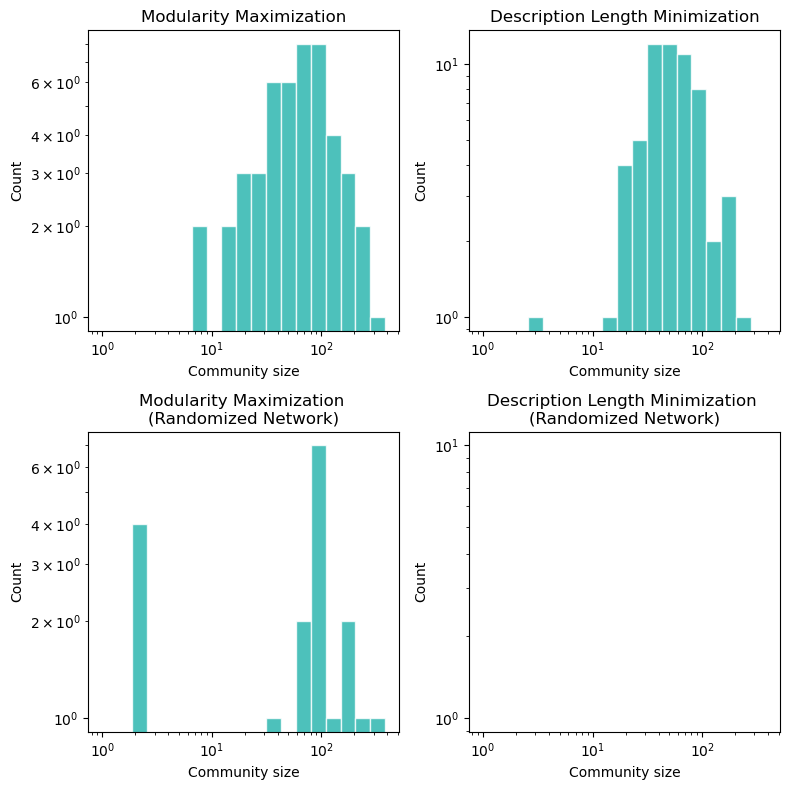

In [423]:
#plotting community size distributions


def get_comm_sizes(partition):
    """
    Gets list of community sizes for a given network partition.

    
    Inputs:
    partition - Network partition in dictionary form {node id: community id}.

    Outputs:
    comm_sizes - List of community sizes.
    
    
    """
    
    communities = list(set(list(partition.values())))

    comm_sizes_dict = {community:0 for community in communities}
    for node in list(partition.keys()):
        for community in communities:
            if partition[node] == community:
                comm_sizes_dict[community] += 1

    comm_sizes = list(comm_sizes_dict.values())

    return comm_sizes
        
#plotting
fig,ax = plt.subplots(2,2,figsize=(8,8),dpi=100)

ax[0,0].hist(get_comm_sizes(partition),color='lightseagreen', edgecolor='white',alpha=0.8, bins=np.logspace(0, np.log10(max(get_comm_sizes(partition))), 20))
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel("Community size")
ax[0,0].set_ylabel("Count")
ax[0,0].set_title("Modularity Maximization")



ax[0,1].hist(get_comm_sizes(gt_partition),color='lightseagreen', edgecolor='white',alpha=0.8, bins=np.logspace(0, np.log10(max(get_comm_sizes(partition))), 20))
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel("Community size")
ax[0,1].set_ylabel("Count")
ax[0,1].set_title("Description Length Minimization")



ax[1,0].hist(get_comm_sizes(partition_rand),color='lightseagreen', edgecolor='white',alpha=0.8, bins=np.logspace(0, np.log10(max(get_comm_sizes(partition))), 20))
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel("Community size")
ax[1,0].set_ylabel("Count")
ax[1,0].set_title("Modularity Maximization \n(Randomized Network)")


ax[1,1].hist(get_comm_sizes(gt_partition_rand),color='lightseagreen', edgecolor='white',alpha=0.8, bins=np.logspace(0, np.log10(max(get_comm_sizes(partition))), 20))
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel("Community size")
ax[1,1].set_ylabel("Count")
ax[1,1].set_title("Description Length Minimization \n(Randomized Network)")

plt.tight_layout()
plt.savefig('comm_sizes.png')
plt.show()


## Question 3b

In [445]:
# Question 3bi
# Write a function that outputs a powerlaw degree sequence

def powerlaw_degree_sequence(n,gamma,k):
    """
    Outputs a power law degree sequence {k1,k2,...kn}, which can be used as input in a configuration model.

    Inputs:
    n (int) :
        number of nodes
    gamma (int) :
        power law degree exponent
    k (int) :
        average degree

    Output:
    degrees (array) :
        list of degrees

    """

    
    
    #generate raw samples
    seq_orig = scipy.stats.pareto.rvs(b=gamma-1,size=n)

    #convert to integers
    degrees = np.round(seq_orig).astype(int)

    #scale to match average degree
    current_mean = np.mean(degrees)
    scaler = k/current_mean
    degrees = np.round(degrees*scaler).astype(int)


    return degrees


In [ ]:
powerlaw_degree_sequence(100,2,12)

In [457]:
#Question 3bii


import numpy as np

def degree_split(degree_sequence, mu):
    """
    Assigns fraction of node's degrees to be internal community edges based on mu value.

    Inputs:
    degree_sequence (list):
        list of node degrees
    mu (float):
        degree assignment parameter. Fraction between 0 and 1.


    Outputs:
    in_degrees (list) : 
        List of node degrees that are in the node's community.
    out_degrees (list): 
        List of node degrees that are outside the node's community.
    """
    
  
    in_degrees = np.round(degree_sequence * (1 - mu)).astype(int)

    
    out_degrees = degree_sequence - in_degrees


    
    return in_degrees, out_degrees


In [461]:
degree_sequence = powerlaw_degree_sequence(100,5,12)
print(degree_sequence)
mu = 0.54

print(degree_split(degree_sequence, mu))


[10 10 10 10 10 20 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 20 10
 10 10 10 10 20 10 10 10 20 10 10 10 10 10 20 30 10 20 10 10 10 10 10 10
 10 20 20 20 10 10 20 10 10 10 10 20 10 10 20 20 10 20 20 10 10 20 10 10
 10 10 10 10 10 10 20 10 10 10 10 10 10 10 10 10 10 10 10 20 10 10 10 10
 10 10 10 10]
(array([ 5,  5,  5,  5,  5,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  9,  5,  5,  5,  5,  5,  9,  5,  5,  5,  9,  5,
        5,  5,  5,  5,  9, 14,  5,  9,  5,  5,  5,  5,  5,  5,  5,  9,  9,
        9,  5,  5,  9,  5,  5,  5,  5,  9,  5,  5,  9,  9,  5,  9,  9,  5,
        5,  9,  5,  5,  5,  5,  5,  5,  5,  5,  9,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  9,  5,  5,  5,  5,  5,  5,  5,  5]), array([ 5,  5,  5,  5,  5, 11,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5, 11,  5,  5,  5,  5,  5, 11,  5,  5,  5, 11,  5,
        5,  5,  5,  5, 11, 16,  5, 11,  5,  5,  5,  5,  5,  5,  5, 11, 11,
       11,  5,  5, 11,  

## Question 3c

In [543]:

#example 1
#G=nx.LFR_benchmark_graph(n=40,tau1=2,tau2=3,mu=0.3,average_degree=7) 
#attempts:
# Successful
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# Successful
# Successful

#example 2 (same but with min_community increased)
#G=nx.LFR_benchmark_graph(n=40,tau1=2,tau2=3,mu=0.3,average_degree=7,min_community=3) 
#attempts:
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community

#example 3 (n and min_community increased)
#G=nx.LFR_benchmark_graph(n=1000,tau1=2,tau2=3,mu=0.3,average_degree=7,min_community=10)
#attempts:
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community

#example 4 ( min_community increased further)
#G=nx.LFR_benchmark_graph(n=1000,tau1=2,tau2=3,mu=0.3,average_degree=7,min_community=100)
#attempts:
# Does not converge
# Successful
# ExceededMaxIterations: Could not assign communities; try increasing min_community

#example 5 ( larger mu)
#G=nx.LFR_benchmark_graph(n=100,tau1=2,tau2=3,mu=0.8,average_degree=7,min_community=5)
#attempts:
# Successful
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# Successful
# Successful

#example 6 ( even larger mu)
#G=nx.LFR_benchmark_graph(n=100,tau1=2,tau2=3,mu=0.9,average_degree=7,min_community=5)
# Successful
# Successful
# Successful

#example 7 (high mu and higher average degree and min community)
#G=nx.LFR_benchmark_graph(n=1000,tau1=2,tau2=3,mu=0.9,average_degree=16,min_community=10)
# Successful 
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# Successful

#example 7 (same but low mu)
G=nx.LFR_benchmark_graph(n=1000,tau1=2,tau2=3,mu=0.1,average_degree=16,min_community=10)
#attempts:
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community
# ExceededMaxIterations: Could not assign communities; try increasing min_community

ExceededMaxIterations: Could not assign communities; try increasing min_community